In [ ]:
import pandas as pd
df = pd.read_csv('/content/imdb_indonesian_movies_2.csv')
df = df.drop(columns=['judul_film'])

In [ ]:
df.head()

,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [ ]:
category = pd.get_dummies(df.genre)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='genre')
df_baru

,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [ ]:
sinopsis = df_baru['ringkasan_sinopsis'].values
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
26/26 - 27s - loss: 3.4021e-04 - accuracy: 1.0000 - val_loss: 8.1524 - val_accuracy: 0.3035 - 27s/epoch - 1s/step
Epoch 2/30
26/26 - 27s - loss: 3.0307e-04 - accuracy: 1.0000 - val_loss: 8.2470 - val_accuracy: 0.3134 - 27s/epoch - 1s/step
Epoch 3/30
26/26 - 26s - loss: 2.7868e-04 - accuracy: 1.0000 - val_loss: 8.3737 - val_accuracy: 0.3085 - 26s/epoch - 1s/step
Epoch 4/30
26/26 - 27s - loss: 2.5478e-04 - accuracy: 1.0000 - val_loss: 8.4430 - val_accuracy: 0.3134 - 27s/epoch - 1s/step
Epoch 5/30
26/26 - 27s - loss: 3.7628e-04 - accuracy: 1.0000 - val_loss: 8.5823 - val_accuracy: 0.3134 - 27s/epoch - 1s/step
Epoch 6/30
26/26 - 27s - loss: 3.6646e-04 - accuracy: 1.0000 - val_loss: 8.5708 - val_accuracy: 0.3134 - 27s/epoch - 1s/step
Epoch 7/30
26/26 - 27s - loss: 3.7753e-04 - accuracy: 1.0000 - val_loss: 8.5534 - val_accuracy: 0.3134 - 27s/epoch - 1s/step
Epoch 8/30
26/26 - 27s - loss: 1.9049e-04 - accuracy: 1.0000 - val_loss: 8.6675 - val_accuracy: 0.3184 - 27s/epoch - 1s/step


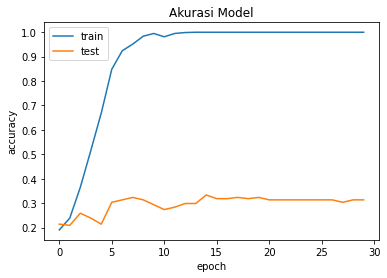

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()